<a href="https://colab.research.google.com/github/Namain231/1st_words/blob/master/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
data = pd.read_csv(r"/content/housing.csv")
df = pd.DataFrame(data)

print("Dimensions of Housing Dataframe:", (df.shape), "\n")
print("Rows:", df.shape[0])
display( df.head())
print("\n")
display(df.describe())

Dimensions of Housing Dataframe: (20640, 10) 

Rows: 20640


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


,index,min,max,mean,median,std
0,longitude,-124.3500,-114.3100,-119.569704,-118.4900,2.003532
1,latitude,32.5400,41.9500,35.631861,34.2600,2.135952
2,housing_median_age,1.0000,52.0000,28.639486,29.0000,12.585558
3,total_rooms,2.0000,39320.0000,2635.763081,2127.0000,2181.615252
4,total_bedrooms,1.0000,6445.0000,537.870553,435.0000,421.385070
5,population,3.0000,35682.0000,1425.476744,1166.0000,1132.462122
6,households,1.0000,6082.0000,499.539680,409.0000,382.329753
7,median_income,0.4999,15.0001,3.870671,3.5348,1.899822
8,median_house_value,14999.0000,500001.0000,206855.816909,179700.0000,115395.615874


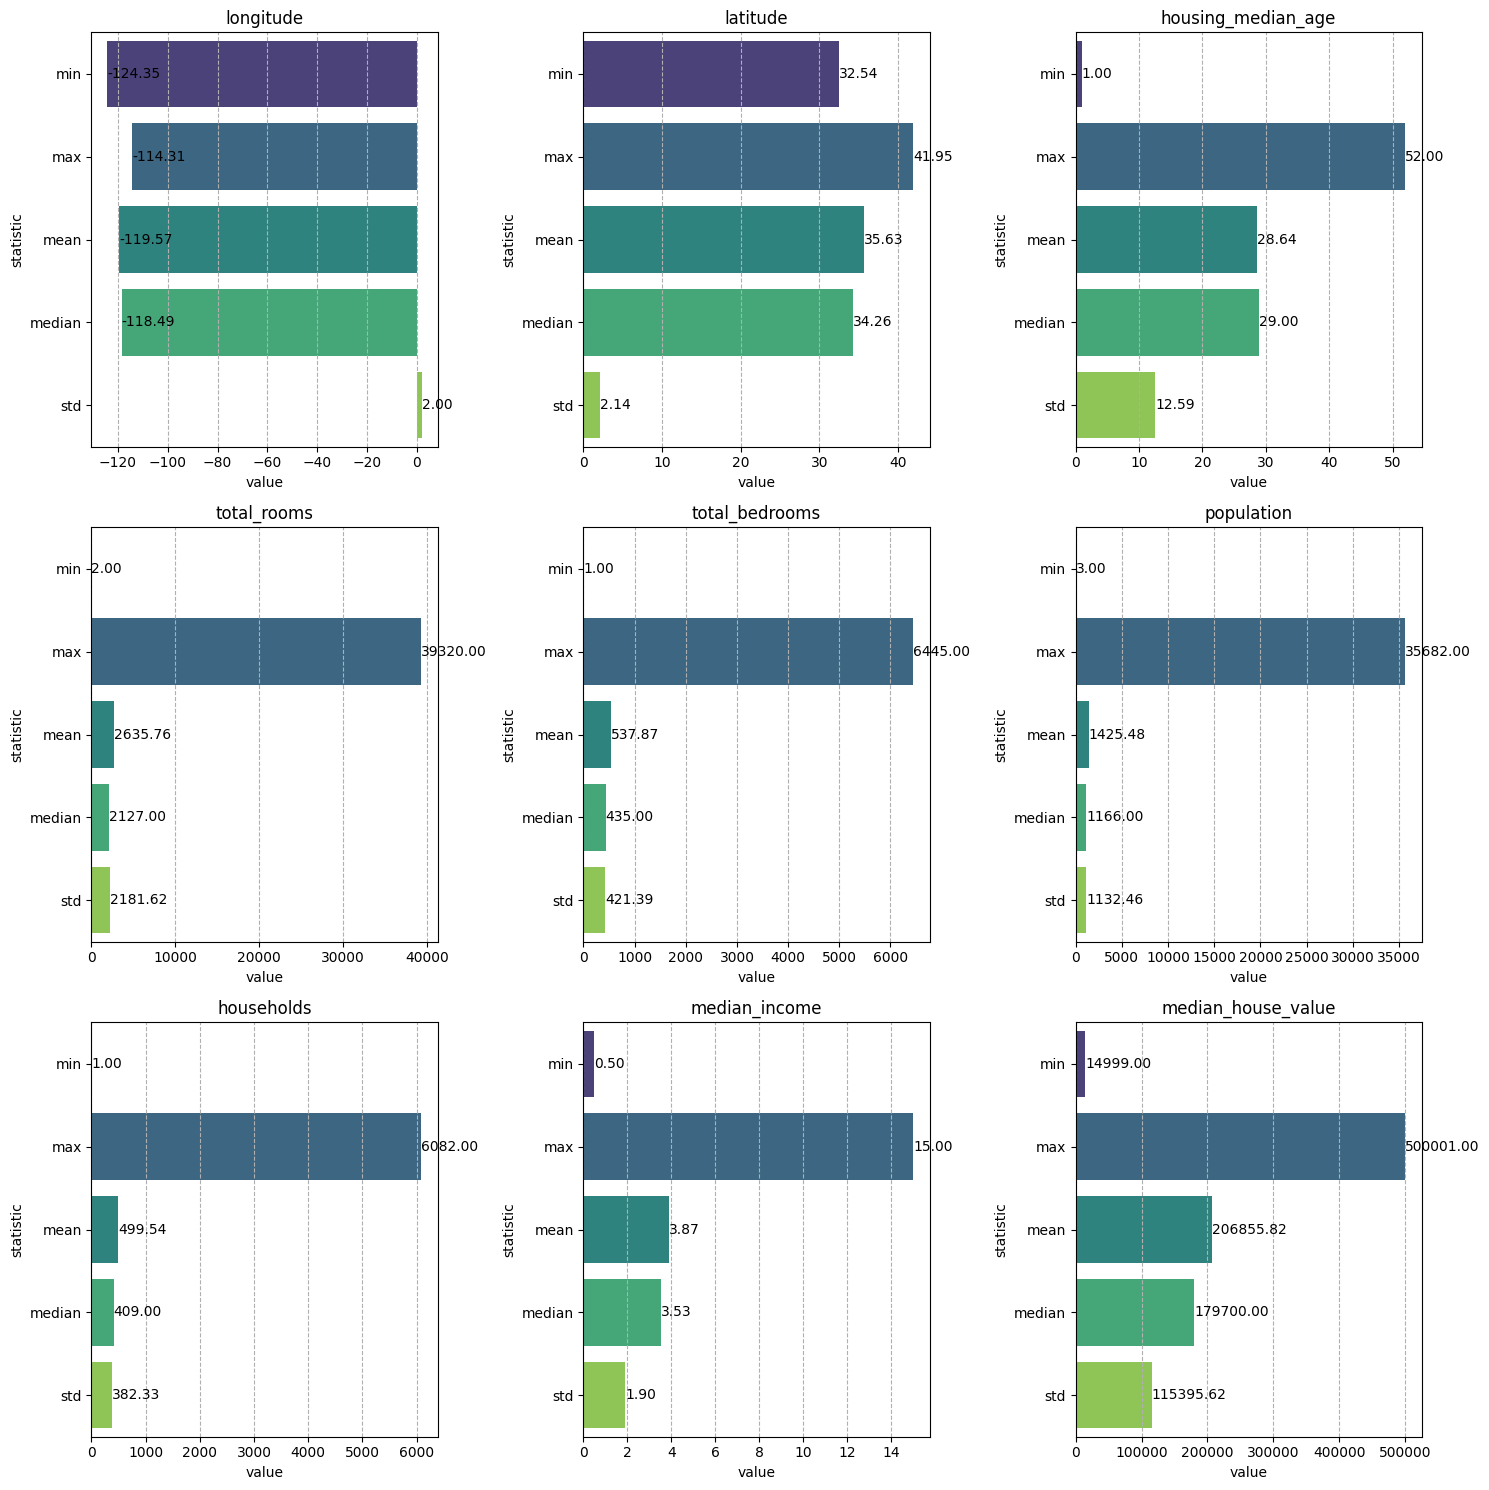

In [33]:
def Visualizer(df):
  df_numerical = df.select_dtypes(include=np.number)
  df_stats = df_numerical.describe().transpose()
  df_viz = df_stats[['min', 'max', 'mean', '50%', 'std']].reset_index()
  df_viz = df_viz.rename(columns={'50%': 'median'})
  display(df_viz)

  df_melted = df_viz.melt(id_vars='index', value_vars=['min', 'max', 'mean', 'median', 'std'], var_name='statistic', value_name='value')
  num_features = len(df_melted['index'].unique())
  n_cols = 3
  n_rows = (num_features + n_cols - 1) // n_cols

  fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
  axes = axes.flatten()

  for i, feature in enumerate(df_melted['index'].unique()):
      ax = axes[i]
      feature_data = df_melted[df_melted['index'] == feature]
      sns.barplot(x='value', y='statistic', data=feature_data, ax=ax, palette='viridis', hue = 'statistic')
      ax.set_title(feature)
      ax.grid(axis='x', linestyle='--')
      for j, v in enumerate(feature_data['value']):
          ax.text(v, j, f'{v:.2f}', color='black', va='center')

  for i in range(num_features, len(axes)):
      fig.delaxes(axes[i])

  plt.tight_layout()
  plt.show()

Visualizer(df)

Number of duplicates:  0
Number of missing values:  0


,index,min,max,mean,median,std
0,longitude,-124.3500,-114.3100,-119.569704,-118.4900,2.003532
1,latitude,32.5400,41.9500,35.631861,34.2600,2.135952
2,housing_median_age,1.0000,52.0000,28.639486,29.0000,12.585558
3,total_rooms,2.0000,39320.0000,2635.763081,2127.0000,2181.615252
4,total_bedrooms,1.0000,6445.0000,537.870553,438.0000,419.266592
5,population,3.0000,35682.0000,1425.476744,1166.0000,1132.462122
6,households,1.0000,6082.0000,499.539680,409.0000,382.329753
7,median_income,0.4999,15.0001,3.870671,3.5348,1.899822
8,median_house_value,14999.0000,500001.0000,206855.816909,179700.0000,115395.615874


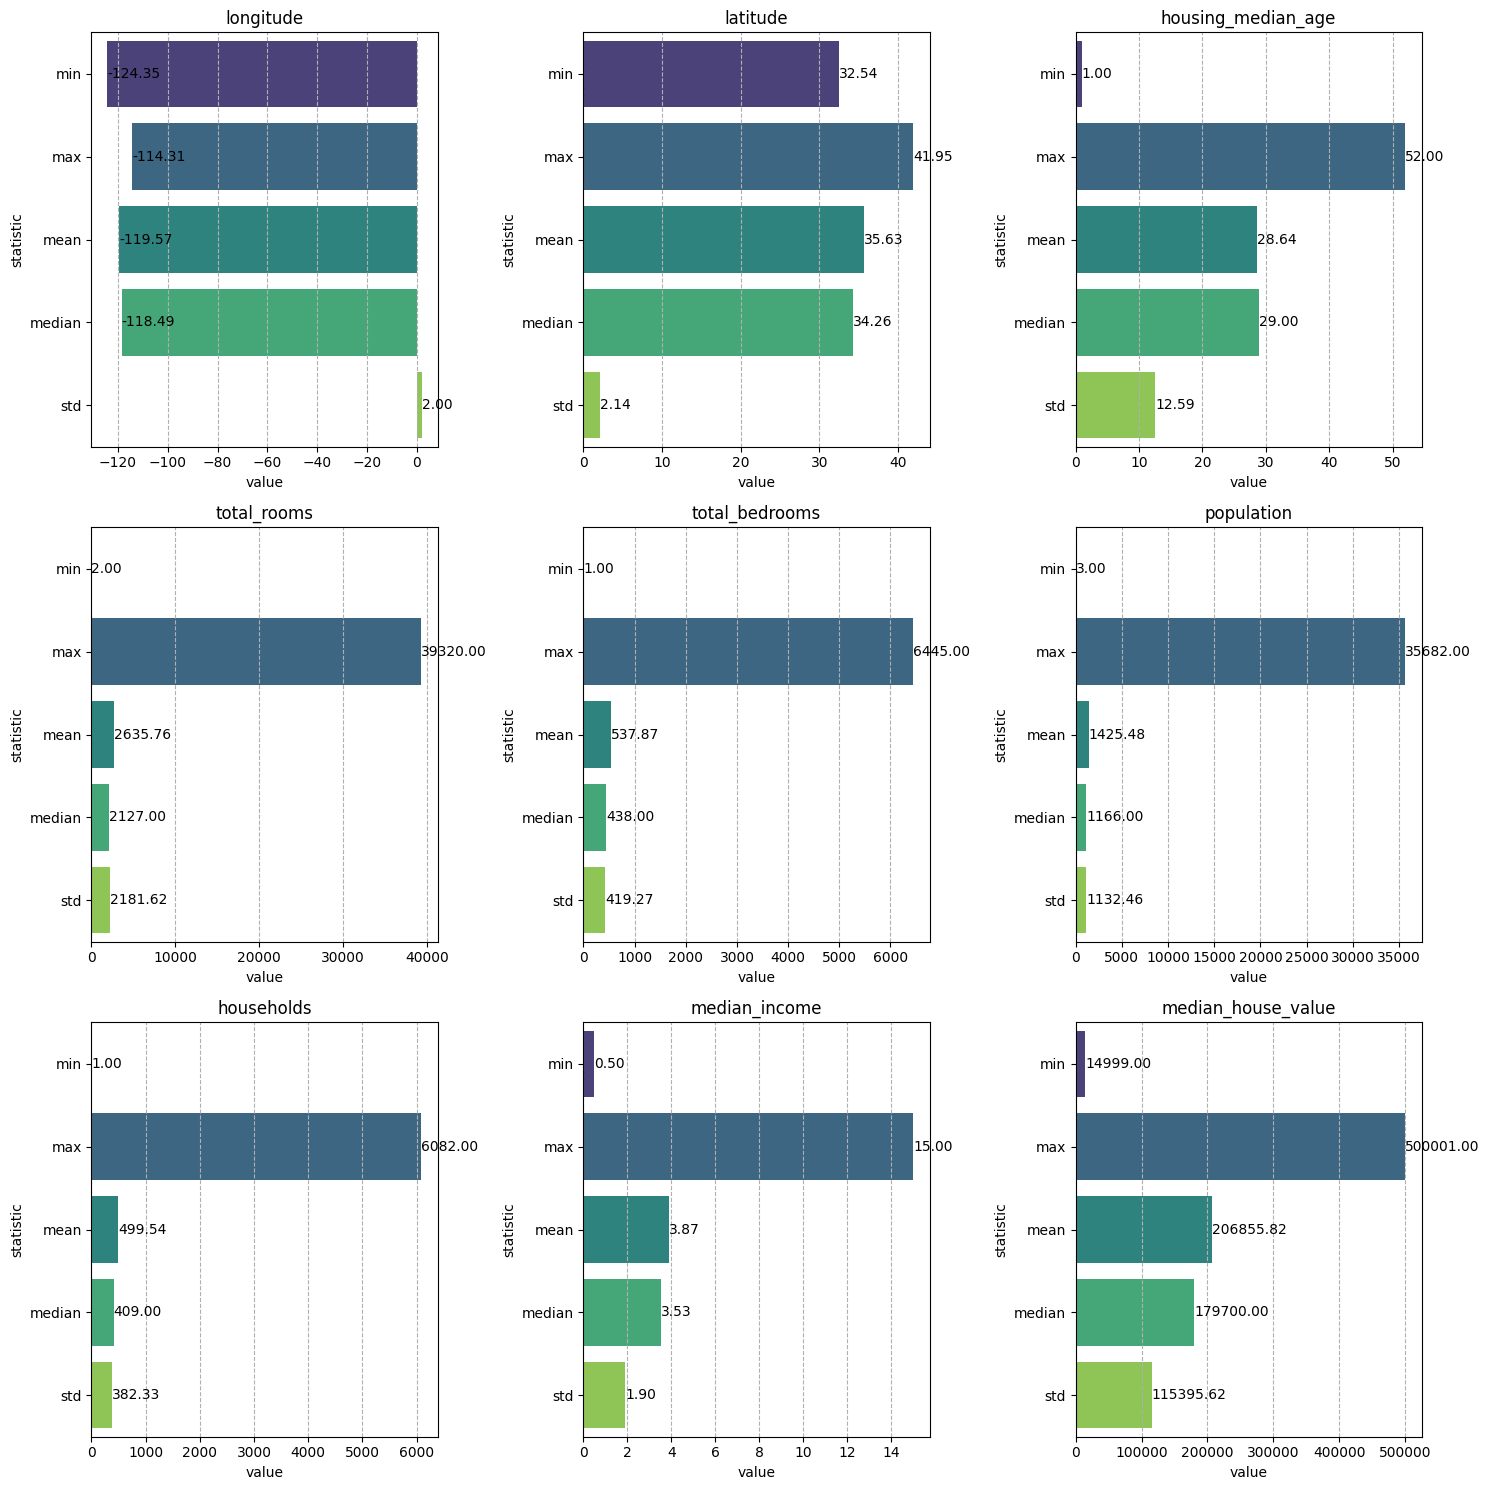

In [37]:
print("Number of duplicates: " , df.duplicated().sum())
print("Number of missing values: " , df.isna().sum().sum())

numerical_cols = df.select_dtypes(include=np.number).columns
missing_values_per_column = df[numerical_cols].isna().sum()
numerical_cols_with_missing_values = missing_values_per_column[missing_values_per_column > 0].index.tolist()

for col in numerical_cols_with_missing_values:
    if df[col].std() > df[col].mean():
        df[col] = df[col].fillna(df[col].median())
    else:
        df[col] = df[col].fillna(df[col].mean())

df['ocean_proximity'] = df['ocean_proximity'].fillna(df['ocean_proximity'].mode())
df.drop_duplicates(inplace=True)
Visualizer(df)
